In [1]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion
from denoising_diffusion_pytorch import Unet1D, GaussianDiffusion1D
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import skew,kurtosis

## Load the data

In [2]:
num_testsub = 32
num_classes = 4
num_channel = 40
num_datapoints = 8064
num_trials = 40
sampling_rate = 128 # 128Hz as given in the data

def loadfiles_normalized():
    data_dict = {}
    print("Loading files into data_dict .................")
    for i in range(num_testsub):
                    if i < 10:
                        name = '%0*d' % (2,i+1)
                    else:
                        name = i+1
                    fname = 'data/noramlized_datasub'+str(name) +'.npy'
                    data_dict["sub%s" %name] = np.load(fname)    
    print("Loaded!!!!!") 
    return data_dict

In [3]:
data = loadfiles_normalized()

Loading files into data_dict .................
Loaded!!!!!


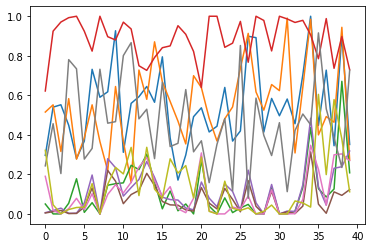

In [4]:
# matrix 1
plt.plot(data['sub01'][0])

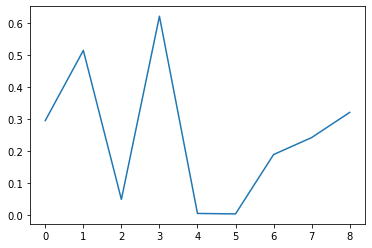

In [6]:
plt.plot(data['sub01'][0][0])

## Get the input into the correct form

In [157]:
data[sub].shape[0]

240

In [178]:
# extract channel 1 for example
channel = 0

# the final matrix should have 7680 (240 matrices per individual * 32 indiviuals/participants) 
matrix = np.empty((7680,1,8))
channel_values = np.empty(9)

sub_counter = 0
# matrix[matrix][always 1][feature]
for sub in data.keys():
    # for i in range to 240 ie. through every matrix
    for i in range(data[sub].shape[0]):
        # for j in range to 9 ie. get all 9 feature values for now only 8 features
        for j in range(data[sub][0].shape[1]-1):
            # data[sub][matrix][channel][feature]
            matrix[i+(240*sub_counter)][0][j] = data[sub][i][channel][j]
            #if sub == 'sub05':
            #    print(i+(240*sub_counter))
            #print("i ",i, " j ",j)
            #print("POS ",+i+(240*sub_counter))
            #if sub_counter == 31:
            #    print(j)
    sub_counter = sub_counter +1

In [148]:
sub_counter

0

In [179]:
data['sub06'][0][0]

array([0.3593026 , 0.47781193, 0.40207781, 0.87533982, 0.25840945,
       0.17015066, 0.24862582, 0.65250014, 0.20081508])

In [180]:
matrix[1200][0]

array([0.3593026 , 0.47781193, 0.40207781, 0.87533982, 0.25840945,
       0.17015066, 0.24862582, 0.65250014])

In [176]:
data['sub01'][1][0]

array([0.36609318, 0.6017849 , 0.20419111, 0.09954929, 0.24677401,
       0.19076162, 0.49589925, 0.00299807, 0.93352264])

In [167]:
matrix[1][0]

array([0.36609318, 0.6017849 , 0.20419111, 0.09954929, 0.24677401,
       0.19076162, 0.49589925, 0.00299807])

In [181]:
matrix.shape

(7680, 1, 8)

In [182]:
tensor_matrix = torch.tensor(matrix).float()

In [142]:
tensor_matrix.shape

torch.Size([240, 1, 8])

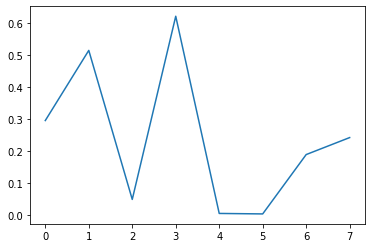

In [143]:
plt.plot(matrix[0][0])

## Define the Diffusion Model
### I had to drop the last feature (temporarly!) cause I got dimensionality errors - will have to take a closer look into how everything works and is connected

In [183]:
model = Unet1D(
    dim = 64,
    dim_mults = (1,2,4,8),
    channels = 1
)

diffusion = GaussianDiffusion1D(
    model,
    seq_length = 8,
    timesteps = 1000,
    objective = 'pred_v'
)

training_seq = tensor_matrix # features are normalized from 0 to 1
loss = diffusion(training_seq)
loss.backward()

# after a lot of training

sampled_seq = diffusion.sample(batch_size = 4)
sampled_seq.shape # (4, 32, 128)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([4, 1, 8])

In [184]:
sampled_seq = diffusion.sample(batch_size = 60)
sampled_seq.shape # (4, 32, 128)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([60, 1, 8])

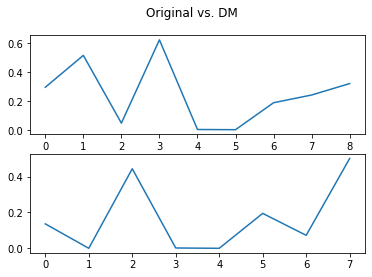

In [137]:
fig, axs = plt.subplots(2)
fig.suptitle('Original vs. DM')
axs[0].plot(data['sub01'][0][0])
axs[1].plot(sampled_seq[59][0])